In [1]:
import os 
import numpy as np
import torch

import torchvision
from torchvision import datasets, models, transforms
import matplotlib.pyplot as plt

%matplotlib inline

In [2]:
print(torch.cuda.is_available())

True


In [14]:
gpu = False#torch.cuda.is_available()

if gpu:
    print('Train on GPU.....')
else:
    print('Train on CPU......')

Train on CPU......


In [15]:
folder = 'flower_photos/'
train_dir = os.path.join(folder, 'train/')
test_dir = os.path.join(folder, 'test/')

print(folder, train_dir, test_dir)
classes = ['daisy', 'dandelion', 'roses', 'sunflower', 'tulips']

flower_photos/ flower_photos/train/ flower_photos/test/


In [16]:
classes

['daisy', 'dandelion', 'roses', 'sunflower', 'tulips']

In [17]:
transform = transforms.Compose([transforms.RandomResizedCrop(224), transforms.ToTensor()])

train_data = datasets.ImageFolder(train_dir, transform=transform)
test_data = datasets.ImageFolder(test_dir, transform=transform)

print('Number of training images: ', len(train_data))
print('Number of testing images: ', len(test_data))

Number of training images:  3130
Number of testing images:  540


In [18]:
batch = 20
workers = 0

train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch, 
                                           num_workers=workers, shuffle=True)
test_loader = torch.utils.data.DataLoader(test_data, batch_size=batch,
                                          num_workers=workers, shuffle=True)

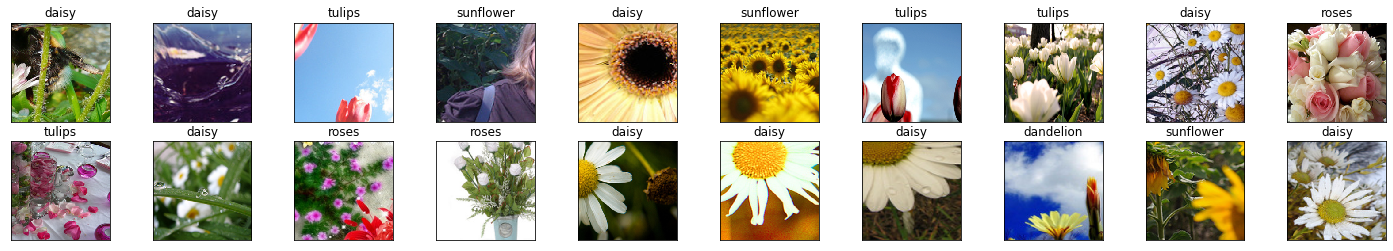

In [19]:
# Visualize some sample data

# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy() # convert images to numpy for display

# plot the images in the batch, along with the corresponding labels
fig = plt.figure(figsize=(25, 4))
for idx in np.arange(20):
    ax = fig.add_subplot(2, 20/2, idx+1, xticks=[], yticks=[])
    plt.imshow(np.transpose(images[idx], (1, 2, 0)))
    ax.set_title(classes[labels[idx]])

In [20]:
vgg16 = models.vgg16(pretrained=True)
print(vgg16)

VGG(
  (features): Sequential(
    (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU(inplace=True)
    (2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU(inplace=True)
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (5): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (6): ReLU(inplace=True)
    (7): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (8): ReLU(inplace=True)
    (9): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
    (10): Conv2d(128, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (11): ReLU(inplace=True)
    (12): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (13): ReLU(inplace=True)
    (14): Conv2d(256, 256, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (15): ReLU(inplace=True)
    (16): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1

In [21]:
print(vgg16.classifier[6].in_features)
print(vgg16.classifier[6].out_features)

4096
1000


In [22]:
for param in vgg16.features.parameters():
    param.requires_grand = False

In [23]:
import torch.nn as nn

n_inputs = vgg16.classifier[6].in_features

last_layer = nn.Linear(n_inputs, len(classes))

vgg16.classifier[6] = last_layer

if gpu:
    vgg16.cuda()
    
print(vgg16.classifier[6].out_features)

5


In [24]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()

optimizer = optim.SGD(vgg16.classifier.parameters(), lr=0.001)

In [25]:
n_epochs = 100

for epoch in range(1, n_epochs+1):
    
    train_loss = 0
    
    for batch_i, (data, target) in enumerate(train_loader):
        if gpu:
            data, target = data.cuda(), target.cuda()
            
    optimizer.zero_grad()
    output = vgg16(data)
    loss = criterion(output, target)
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    
    if batch_i % 20 == 19:
        print('Epoch %d, Batch %d loss: %.16f' %
             (epoch, batch_i + 1, train_loss / 20))
        train_loss = 0.0

KeyboardInterrupt: 

In [ ]:
dataiter = iter(test_loader)
images, labels = dataiter.next()
images.numpy()

if gpu:
    images = images.cuda()
    
output = vgg16(images)

_, preds_tensor = torch.max(output, 1)

preds = np.squeeze(preds_tensor.numpy()) 
if not gpu:
    else np.squeeze(preds_tensor.cpu().numpy())
    
fig = plt.figure(figsize=25, 4)
